In [57]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import nltk
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("~/OneDrive/MAC/UCI MSBA Coursework/Winter 2022/BANA 275 Natural Language Processing/Weekly Activity/training data-2.csv", index_col=None)

In [3]:
# lets look at the data
data.head()

,index,review,lable
0,1,Some of the filmmakers who are participating i...,negative
1,2,Truly unique and stunning film of Jules Verne'...,positive
2,3,This light-heated (for Cassavetes)love story i...,positive
3,4,"this is indeed a treat for every Bolan fan, so...",positive
4,5,This movie had very few moments of real drama....,negative


In [4]:
data = data.drop('index', axis=1)

In [5]:
#sentiment count
data['lable'].value_counts()

negative    20029
positive    19971
Name: lable, dtype: int64

### Cleaning & Preparing the data

In [6]:
# encoding the labels for positive and negative to binary 
data['lable'] = data['lable'].map(lambda x: 0 if x == 'negative' else 1)
data.head()

,review,lable
0,Some of the filmmakers who are participating i...,0
1,Truly unique and stunning film of Jules Verne'...,1
2,This light-heated (for Cassavetes)love story i...,1
3,"this is indeed a treat for every Bolan fan, so...",1
4,This movie had very few moments of real drama....,0


In [7]:
# converting the reviews to lowercase
data['review'] = data['review'].apply(lambda x:x.lower())

# removing punctuation
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

data['review'] = data['review'].apply(lambda x : remove_punctuation(x))

# removing stopwords
stopwords = stopwords.words('english')

data['review'] = data['review'].apply(lambda x: [item for item in x.split() if item not in stopwords]).apply(lambda x:" ".join(x))


In [8]:
# Initialising the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# defining our lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

# applying the lemmatizer function to our reviews
data['review'] = data.review.apply(lambda x :' '.join(lemmatize_text(x)))

### Setting up Bag of Words and TF-IDF

In [9]:
#Dividing data into train and test dataset
data_x = data['review']
data_y = data['lable']


In [10]:
# creating a function for our vectorizers
def vect(train_x, vectorizer):
    fit_vect = vectorizer.fit_transform(train_x)
    return fit_vect


In [11]:
# Bag of Words Vectorizers
bow = CountVectorizer()
bowbigram = CountVectorizer(ngram_range=(1,2))

bow_X = vect(data_x, bow)

In [12]:
bowbigram_X = vect(data_x, bowbigram)

In [19]:
# TF-IDF Vectorizers
tfidf = TfidfVectorizer(sublinear_tf=True)
tfidf_bigram = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
tfidf_trigram = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3))

tfidf_X = vect(data_x, tfidf)

In [18]:
tfidfbi_X = vect(data_x, tfidf_bigram)

In [20]:
tfidftri_X = vect(data_x, tfidf_trigram)

### Machine Learning Models

In [43]:
# creating a function for running models

def classification(train_x, train_y, model, option):
    
    # Train test split
    X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=42)
    m = model
    ml = m.fit(X_train,y_train)
    test_predict = m.predict(X_test)
    acc_score = accuracy_score(y_test,test_predict)
    train_predict = m.predict(X_train)
    train_f1 = f1_score(y_train,train_predict, average='micro')
    test_f1 = f1_score(y_test,test_predict, average='micro')
    
    
    if option == 1:
        print('Accuracy Score: ', acc_score)
        #Classification report
        report = classification_report(y_test,test_predict,target_names=['Positive','Negative'])
        print(report)
        #confusion matrix for bag of words
        cm = confusion_matrix(y_test,test_predict,labels=[1,0])
        print(cm)
        
        print('Training F1: ',train_f1)
        print('Testing F1: ',test_f1)
        
    if option == 2:
        return train_f1, test_f1 
    

### Logistic Regression

In [33]:
lr = LogisticRegression()
# bow results
print('Logistic Regression using Bag of Words')
classification(bow_X, data_y, lr, 1)

Logistic Regression using Bag of Words
Accuracy Score:  0.8836666666666667
              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      5989
    Negative       0.88      0.90      0.89      6011

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

[[5381  630]
 [ 766 5223]]
Training F1:  0.99775
Testing F1:  0.8836666666666668


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# bowbigram results
print('Logistic Regression using Bag of Words - Bigram')
classification(bowbigram_X, data_y, lr, 1)

Logistic Regression using Bag of Words - Bigram
Accuracy Score:  0.8979166666666667
              precision    recall  f1-score   support

    Positive       0.91      0.89      0.90      5989
    Negative       0.89      0.91      0.90      6011

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

[[5471  540]
 [ 685 5304]]
Training F1:  1.0
Testing F1:  0.8979166666666667


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print('Logistic Regression using TF-IDF')
classification(tfidf_X, data_y, lr, 1)

Logistic Regression using TF-IDF
Accuracy Score:  0.8935833333333333
              precision    recall  f1-score   support

    Positive       0.91      0.88      0.89      5989
    Negative       0.88      0.91      0.90      6011

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

[[5460  551]
 [ 726 5263]]
Training F1:  0.93625
Testing F1:  0.8935833333333333


In [35]:
print('Logistic Regression using TF-IDF - Bigram')
classification(tfidfbi_X, data_y, lr, 1)

Logistic Regression using TF-IDF - Bigram
Accuracy Score:  0.89075
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      5989
    Negative       0.88      0.91      0.89      6011

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

[[5462  549]
 [ 762 5227]]
Training F1:  0.9632142857142857
Testing F1:  0.8907499999999999


In [36]:
print('Logistic Regression using TF-IDF - Trigram')
classification(tfidftri_X, data_y, lr, 1)

Logistic Regression using TF-IDF - Trigram
Accuracy Score:  0.8826666666666667
              precision    recall  f1-score   support

    Positive       0.90      0.86      0.88      5989
    Negative       0.87      0.91      0.89      6011

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

[[5443  568]
 [ 840 5149]]
Training F1:  0.9751785714285715
Testing F1:  0.8826666666666667


### Multinomial Naive Bayes - MNB

In [37]:
mnb = MultinomialNB()
# bow results
print('Multinomial Naive Bayes using Bag of Words')
classification(bow_X, data_y, mnb, 1)

Multinomial Naive Bayes using Bag of Words
Accuracy Score:  0.85725
              precision    recall  f1-score   support

    Positive       0.84      0.88      0.86      5989
    Negative       0.87      0.83      0.85      6011

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

[[5018  993]
 [ 720 5269]]
Training F1:  0.9193928571428571
Testing F1:  0.85725


In [38]:
# bowbigram results
print('Multinomial Naive Bayes using Bag of Words - Bigram')
classification(bowbigram_X, data_y, mnb, 1)

Multinomial Naive Bayes using Bag of Words - Bigram
Accuracy Score:  0.8835
              precision    recall  f1-score   support

    Positive       0.86      0.91      0.89      5989
    Negative       0.90      0.86      0.88      6011

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

[[5160  851]
 [ 547 5442]]
Training F1:  0.9971785714285715
Testing F1:  0.8835000000000001


In [39]:
print('Multinomial Naive Bayes using TF-IDF')
classification(tfidf_X, data_y, mnb, 1)

Multinomial Naive Bayes using TF-IDF
Accuracy Score:  0.8681666666666666
              precision    recall  f1-score   support

    Positive       0.85      0.89      0.87      5989
    Negative       0.89      0.84      0.86      6011

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

[[5067  944]
 [ 638 5351]]
Training F1:  0.9218214285714286
Testing F1:  0.8681666666666666


In [40]:
print('Multinomial Naive Bayes using TF-IDF - Bigram')
classification(tfidfbi_X, data_y, mnb, 1)

Multinomial Naive Bayes using TF-IDF - Bigram
Accuracy Score:  0.8896666666666667
              precision    recall  f1-score   support

    Positive       0.87      0.92      0.89      5989
    Negative       0.91      0.86      0.89      6011

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

[[5174  837]
 [ 487 5502]]
Training F1:  0.9899285714285714
Testing F1:  0.8896666666666667


In [41]:
print('Multinomial Naive Bayes using TF-IDF - Trigram')
classification(tfidftri_X, data_y, mnb, 1)

Multinomial Naive Bayes using TF-IDF - Trigram
Accuracy Score:  0.8900833333333333
              precision    recall  f1-score   support

    Positive       0.87      0.92      0.89      5989
    Negative       0.91      0.86      0.89      6011

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

[[5194  817]
 [ 502 5487]]
Training F1:  0.9986428571428572
Testing F1:  0.8900833333333333


Bag of Words Multinomial NB using different values for alpha
0.0 => (0.9750714285714286, 0.7765833333333334)
0.1 => (0.94925, 0.8535833333333334)
0.2 => (0.9421071428571428, 0.8554999999999999)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.30000000000000004 => (0.9374642857142857, 0.8560833333333333)
0.4 => (0.9331785714285714, 0.8559166666666667)
0.5 => (0.9296785714285714, 0.8566666666666667)
0.6000000000000001 => (0.9265714285714286, 0.8569166666666667)
0.7000000000000001 => (0.9241428571428572, 0.8571666666666666)
0.8 => (0.9223214285714286, 0.8571666666666666)
0.9 => (0.92075, 0.8571666666666666)


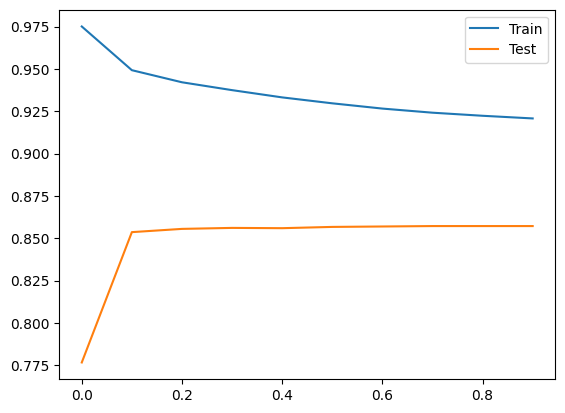

In [44]:
print('Bag of Words Multinomial NB using different values for alpha')
arange = np.arange(0, 1, 0.1)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(bow_X, data_y, model, 2)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

Bag of Words - Bigram Multinomial NB using different values for alpha


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.0 => (1.0, 0.8215833333333332)
0.1 => (0.9998214285714285, 0.87375)
0.2 => (0.9996428571428572, 0.8768333333333334)
0.30000000000000004 => (0.9994285714285714, 0.8801666666666667)
0.4 => (0.9991785714285715, 0.8805833333333334)
0.5 => (0.999, 0.8815833333333334)
0.6000000000000001 => (0.9986785714285714, 0.882)
0.7000000000000001 => (0.9983214285714286, 0.8831666666666667)
0.8 => (0.9979285714285714, 0.8835000000000001)
0.9 => (0.9975357142857143, 0.8834166666666666)


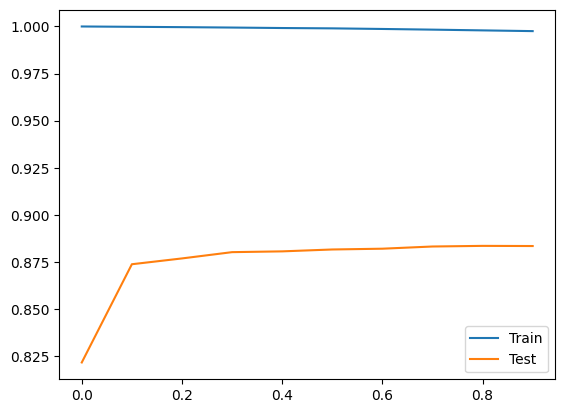

In [45]:
print('Bag of Words - Bigram Multinomial NB using different values for alpha')
arange = np.arange(0, 1, 0.1)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(bowbigram_X, data_y, model, 2)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

TF-IDF Multinomial NB using different values for alpha
0.0 => (0.9833928571428572, 0.76725)
0.1 => (0.9628928571428571, 0.8625833333333333)
0.2 => (0.9541785714285714, 0.86625)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.30000000000000004 => (0.9459642857142857, 0.86675)
0.4 => (0.94, 0.8688333333333332)
0.5 => (0.9349285714285714, 0.8694166666666666)
0.6000000000000001 => (0.9318214285714285, 0.86875)
0.7000000000000001 => (0.9282857142857143, 0.86825)
0.8 => (0.9259285714285714, 0.8680833333333333)
0.9 => (0.9237142857142857, 0.868)


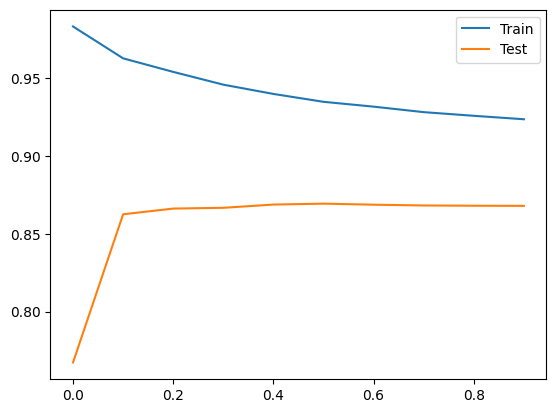

In [47]:
print('TF-IDF Multinomial NB using different values for alpha')
arange = np.arange(0, 1, 0.1)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(tfidf_X, data_y, model, 2)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

TF-IDF - Bigram Multinomial NB using different values for alpha
0.0 => (1.0, 0.8156666666666667)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.1 => (0.9998928571428571, 0.8910833333333333)
0.2 => (0.9997142857142857, 0.8928333333333334)
0.30000000000000004 => (0.9989642857142857, 0.8930833333333333)
0.4 => (0.9977857142857143, 0.89325)
0.5 => (0.9967142857142857, 0.8925833333333333)
0.6000000000000001 => (0.9957857142857143, 0.8915)
0.7000000000000001 => (0.9944642857142857, 0.8909166666666667)
0.8 => (0.9930357142857144, 0.89025)
0.9 => (0.9914642857142857, 0.8896666666666667)


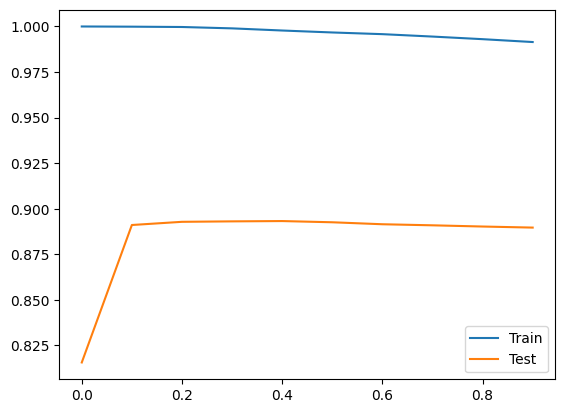

In [48]:
print('TF-IDF - Bigram Multinomial NB using different values for alpha')
arange = np.arange(0, 1, 0.1)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(tfidfbi_X, data_y, model, 2)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

TF-IDF - Trigram Multinomial NB using different values for alpha


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.0 => (1.0, 0.83475)
0.1 => (1.0, 0.8946666666666667)
0.2 => (1.0, 0.89475)
0.30000000000000004 => (0.9999642857142857, 0.8945)
0.4 => (0.9998928571428571, 0.8939166666666667)
0.5 => (0.9998928571428571, 0.8938333333333335)
0.6000000000000001 => (0.99975, 0.8930833333333333)
0.7000000000000001 => (0.9995357142857143, 0.8918333333333334)
0.8 => (0.9993928571428572, 0.891)
0.9 => (0.9991071428571429, 0.8905833333333333)


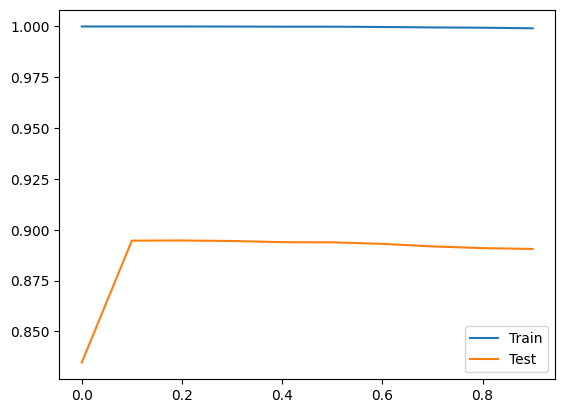

In [49]:
print('TF-IDF - Trigram Multinomial NB using different values for alpha')
arange = np.arange(0, 1, 0.1)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(tfidftri_X, data_y, model, 2)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

### Ensemble Methods

In [68]:
def ensemble(data_x, data_y, vect):
    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42) 

    dt_model = DecisionTreeClassifier(min_samples_split=0.35)

    ensemble_classifier = make_pipeline(vect, VotingClassifier(estimators=[('LR', lr), ('MNB', mnb), ('DT', dt_model)], voting = 'soft',  weights=[1,1,1]))
    ensemble_classifier.fit(X_train, y_train) 

    ensemble_train_preds = ensemble_classifier.predict(X_train)
    ensemble_train_f1 = f1_score(y_train, ensemble_train_preds, average='micro')
    ensemble_test_preds = ensemble_classifier.predict(X_test)
    ensemble_test_f1 = f1_score(y_test, ensemble_test_preds, average='micro')
    return ensemble_train_f1, ensemble_test_f1

In [ ]:
vectorizer_names = ['Bag of Words', 'Bag of Words = Bigram', 'TF-IDF', 'TF-IDF - Bigram', 'TF-IDF - Trigram']
vectorizers = [bow, bowbigram, tfidf, tfidf_bigram, tfidf_trigram]
results = []
for i in range(len(vectorizers)):
  res = ensemble(data_x, data_y, vectorizers[i])
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(vectorizer_names, results)
plt.legend(["Train", "Test"])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bag of Words => (0.9541071428571428, 0.8870833333333333)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bag of Words = Bigram => (0.9982857142857143, 0.8980833333333332)
TF-IDF => (0.9127857142857143, 0.8803333333333333)
TF-IDF - Bigram => (0.9476071428571429, 0.8731666666666666)


### Best Model is Ensemble using Bag of Words - Bigram giving us a test F1 score of 0.898 closely followed by Logistic Regression using Bag of Words - Bigram giving us a test F1 score of 0.897
